In [12]:
import numpy as np

In [13]:
from network import Network
from evaluation import Evaluation
import activations

In [14]:
x = np.linspace(-10, 10, 100)

In [15]:
weights = np.array([np.array([-0.634700665707495, 1.656731026589558, 1.124487323633357, -0.795741403939511, -1.168109939313002, 0.869874974297699, -1.008855879224341, 1.914651700028183, 1.240317284056857, -1.420252553244148]).reshape(10, 1), # W0
                       np.array([-0.258472107285207, -0.680982998070259, 1.560623889702786, -1.220971595926017, -0.027188941462718, -1.010335979063966, 0.835793863154799, 1.222569086520831, 0.259056187128039, 0.245551285836084]).reshape(10, 1), # b0
                       np.array([0.082854200378300, 0.992706291627412, -1.256284879106125, 0.554918709010267, 0.317351602368993, 1.250828758360099, 1.679813903514902, -0.287094733070243, 1.701671362974561, -0.829936846466298]), # W1
                       np.array([1.864581839050232])], # b1
                   dtype='object')

In [16]:
NNo = Network()
NNo.load(2, weights)  # load NNo with weights

In [17]:
pruned_weights = np.array([np.array([0, 1.656731026589558, 1.124487323633357, 0, -1.168109939313002, 0.869874974297699, -1.008855879224341, 1.914651700028183, 1.240317284056857, -1.420252553244148]).reshape(10, 1), # W0
                               np.array([-0.258472107285207, -0.680982998070259, 1.560623889702786, -1.220971595926017, -0.027188941462718, -1.010335979063966, 0.835793863154799, 1.222569086520831, 0.259056187128039, 0.245551285836084]).reshape(10, 1), # b0
                               np.array([0.082854200378300, 0.992706291627412, -1.256284879106125, 0.554918709010267, 0, 1.250828758360099, 1.679813903514902, 0, 1.701671362974561, -0.829936846466298]), # W1
                               np.array([1.864581839050232])], # b1
                        dtype='object')

In [18]:
NNr = Network()
NNr.load(2, pruned_weights)  # load NNr with pruned weights

In [19]:
prob = Evaluation(x, 10, NNo, 10, NNr)  # set up synthesis problem, generate NNrs with g in range 1-9
prob.output(activations.relu, activations.null)

In [20]:
'''choice of c1, c2 seem to affect the correctness of bounds (if c2 is too large, eps is not sufficiently large)'''
c1, c2 = 1.0, 0.0005  # optimisation constants

Gamma: 2.001091271102985
Eps: 0.44447574994793576


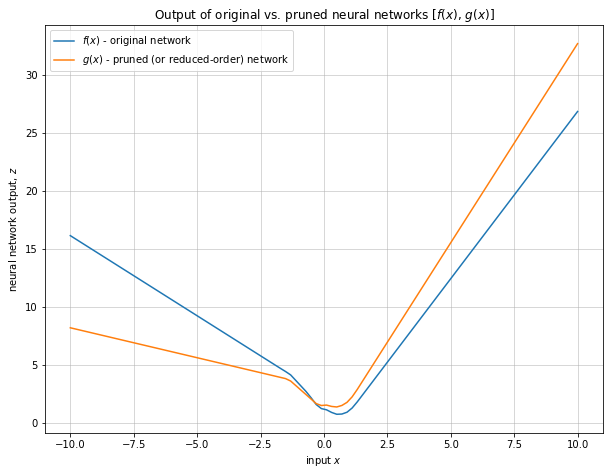

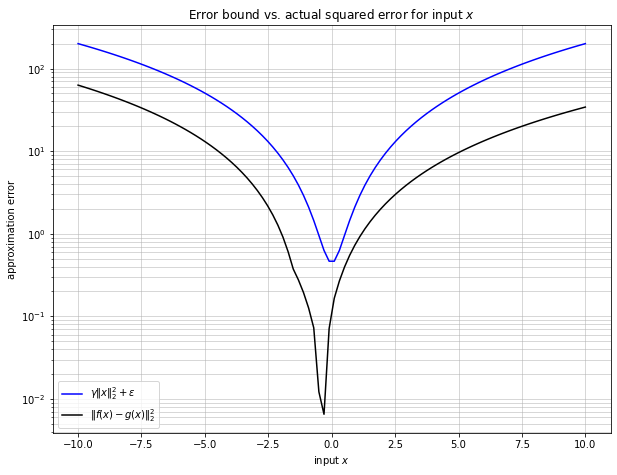

In [21]:
prob.eval_L2(c1, c2, activations.relu, activations.null)
print('Gamma: {0}\nEps: {1}'.format(prob.gamma, prob.eps))
prob.plot()